### Read data

In [1]:
import os

import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None 

DATASET_PATH = "finalDatasetSmall/"
RND_SEED = 123

In [2]:
files_parquet = [os.path.join(DATASET_PATH, f) for f in os.listdir(DATASET_PATH) if f.endswith("parquet")]

NOTEXT_COL = ['contentAudioEmbedding', 'contentEmbedding'] #, 'AUTOTAG_max_proba_sum', 'AUTOTAG_most_frequent', 'AUTOTAG_top_50_precentage_frames',]
TARGET_COL = ['clipTarget']

### Filter samples with not None 'asr' column

In [3]:
df_notna_asr = None 

for file in files_parquet:
    df = pd.read_parquet(file, engine='pyarrow', use_pandas_metadata=True)

    df_filter = df[df['asr'].notna()]
    
    df_filter['asr'].astype('str')
    df_filter = df_filter[df_filter['asr'].apply(len) > 0]

    if df_notna_asr is None:
        df_notna_asr = df_filter
    else:
        df_notna_asr = pd.concat([df_notna_asr, df_filter], ignore_index=True) 


In [4]:
df_notna_asr.head()

,clipTarget,clip_id,owner_id,clipContentCategory,date,contentAudioEmbedding,contentEmbedding,AUTOTAG_max_proba_sum,AUTOTAG_most_frequent,AUTOTAG_top_50_precentage_frames,description,asr,confidence_asr
0,HUMOR,-1093669790,1378576889,SKETCH,2022-04-07,"[-0.10218705, -0.05655528, 0.061748616, 0.0521...","[0.06860607, -0.022857098, -0.016256863, -0.03...","[(Dance, 3.391113), (Food, 0.4365595), (Vehicl...","[(Dance, 6), (Food, 5), (Piano, 2), (Medicine,...","[(Dance, 0.7021045), (Food, 0.105717575)]",Как доктора готовятся к операции,"Как ты думаешь, в наши луки обосрут в коментар...",0.302493
1,HUMOR,1743390480,-1270068438,HUMOR,2022-04-07,"[-0.04119603, -0.061682414, 0.11025277, 0.0997...","[0.04931164, 0.028182184, -0.019459218, -0.090...","[(Comedy (drama), 2.00110378), (Food, 1.913095...","[(Food, 10), (Vehicle, 5), (Comedy (drama), 5)...","[(Food, 0.2490635), (Comedy (drama), 0.3335172...",None,Всегда удается быть такой веселый такой радост...,0.325571
2,HUMOR,330535439,813803967,SKETCH,2022-04-06,"[-0.060104296, -0.11440997, 0.103849456, 0.048...","[-0.00169699, 0.026697062, -0.018162291, -0.01...","[(Food, 6.555504999999999), (Fast food, 5.4205...","[(Food, 7), (Fast food, 7), (Hot dog, 2), (San...","[(Food, 0.98101575), (Fast food, 0.902584), (H...",None,"Все еще раз, когда вам будут говорить, что ты ...",0.483258
3,HUMOR,-1743911914,-1670420952,HUMOR,2022-04-05,"[-0.035930738, 0.05011535, 0.09922745, 0.12816...","[0.003933215, -0.01229575, -0.015865909, -0.03...","[(Vehicle, 2.6043222999999998), (Comedy (drama...","[(Vehicle, 5), (Car, 4), (Comedy (drama), 3), ...","[(Disc jockey, 0.1566126), (Vehicle, 0.5208644...",None,У меня есть двести рублей. Посоветуйте в какой...,0.290076
4,HUMOR,-2040128537,1370100119,HUMOR,2022-04-06,"[-0.1138568, -0.16440803, 0.16629857, 0.038701...","[0.020344917, 0.038545176, -0.026539112, -0.00...","[(Vehicle, 1.65462922), (Car, 1.5593774), (Mac...","[(Vehicle, 10), (Car, 7), (Door, 4), (Machine,...","[(Car, 0.2227682), (Machine, 0.124744714285714...",Рабочие будни монтажников 😂 #скс #монтаж #слаб...,"Смотри, значит задача сделать что-то непонятно...",0.315676


In [5]:
df_notna_asr.tail()

,clipTarget,clip_id,owner_id,clipContentCategory,date,contentAudioEmbedding,contentEmbedding,AUTOTAG_max_proba_sum,AUTOTAG_most_frequent,AUTOTAG_top_50_precentage_frames,description,asr,confidence_asr
7493,FITNESS,-537303616,1450712361,FITNESS,2022-07-07,"[0.047294408, -0.019974021, -0.018716522, 0.14...","[0.0025180478, -0.054577067, -0.013505889, -0....","[(Comedy (drama), 2.1824209999999997), (Call o...","[(Call of Duty: Black Ops, 3), (Call of Duty, ...","[(Call of Duty: Black Ops, 0.18754942499999996...",None,А как когда я буду ходить? Я все время не хочу.,0.144689
7494,CULTURE,1164567667,-1860542668,MUSEUMS,2022-04-06,"[-0.0977943, -0.122427955, 0.08441598, 0.03043...","[0.07280305, 0.03546749, -0.01102451, -0.00072...","[(Vehicle, 21.15178934), (Car, 11.2109909), (B...","[(Vehicle, 44), (Car, 24), (Boat, 6), (Food, 5...","[(Vehicle, 0.7034448571428571), (Car, 0.400392...",None,На вднх в музее гараже особого назначения откр...,0.262092
7495,FITNESS,149160782,-262780233,FITNESS,2022-04-06,"[0.19155526, -0.031394657, -0.16321, 0.0595440...","[0.025089046, 0.023934491, 0.003394355, 0.0246...","[(Dance, 3.2596924000000005), (Game, 0.7743228...","[(Dance, 14), (Game, 11), (Wood, 5), (Car, 4),...","[(Dance, 0.4339462)]",None,"Где без ума от них глаза поделена, а наших дне...",0.102449
7496,FITNESS,-1527642861,486995593,FITNESS,2022-04-06,"[-0.041339368, -0.11627674, 0.18998694, 0.0192...","[0.05042483, 0.013503395, -0.001136759, -0.028...","[(Swimming pool, 2.4570067200000003), (Pilates...","[(Swimming pool, 24), (Vehicle, 19), (Car, 14)...",[],None,"У нас подушка, то мы ее зарываемся в колено зо...",0.193938
7497,FITNESS,-1268309228,-1328452904,FITNESS,2022-04-05,"[-0.05681243, -0.022348536, 0.10629957, 0.0180...","[0.013558937, 0.008335423, -0.010726726, -0.02...","[(Hair, 10.19681823), (Food, 2.51955188), (Bra...","[(Hair, 52), (Food, 36), (Braid, 17), (Recipe,...","[(Hair, 0.3377962142857143)]","☝🏻Спорт без питания невозможен, тогда как пита...","Красивое и здоровое тело. Это спорт и питание,...",0.410034


##### Select classes `clipContentCategory` with at least 20 objects for better train/test/validation.

In [6]:
df_notna_asr = df_notna_asr.groupby('clipTarget').filter(lambda x : len(x) >= 20)
len(df_notna_asr)

7370

In [7]:
classes = df_notna_asr['clipTarget'].unique()
print(classes)

['HUMOR' 'POSING' 'MYSTIC' 'BLOG' 'ANIMALS' 'QUIZ' 'LEISURE' 'MOVIES'
 'LIP_SYNC' 'HEALTH' 'FOREIGN_LANGUAGES' 'CULTURE' 'FITNESS' 'KIDS'
 'DRAWING' 'NEWS' 'FASHION' 'EFFECTS' 'FINANCE' 'SCIENCE' 'SOCIAL'
 'HANDMADE' 'VEHICLES' 'DANCE' 'MUSIC' 'FAMILY' 'EDUCATION' 'LIFEHACK'
 'FOOD' 'SPORT' 'GAMES' 'TECHNOLOGY' 'TRAVEL' 'CREATION' 'RELATIONS'
 'REVIEW' 'BUSINESS' 'BEAUTY' 'NATURE']


##### Concatenate 'contentAudioEmbedding' and 'contentEmbedding' in one vector

In [8]:
df_notna_asr['default_emb'] = df_notna_asr[['contentAudioEmbedding', 'contentEmbedding']].apply(lambda x:  np.concatenate((x[0], x[1])), axis=1)

In [9]:
print(f"Length of total concatenate embedding = {len(df_notna_asr['default_emb'].iloc[0])}")

Length of total concatenate embedding = 1152


### Base clf without text features: Classic ML

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
from matplotlib import pyplot

Train/test split

In [11]:
y = df_notna_asr[TARGET_COL] 
target_encoder = LabelEncoder().fit(y)
y = target_encoder.transform(y)

X = np.stack(df_notna_asr['default_emb'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RND_SEED)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=RND_SEED)

/Users/minakovaa/VSCodeProjects/venv-vscode/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/minakovaa/VSCodeProjects/venv-vscode/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


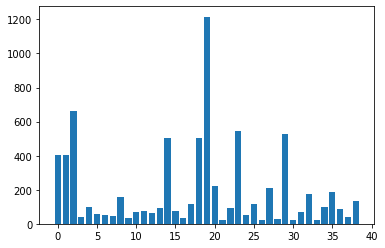

In [12]:
counter = Counter(y)
for k, v in counter.items():
	per = v / len(y) * 100
	# print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Train logistic regression

In [13]:
from collections import defaultdict
acc_score_all = defaultdict(list)

In [14]:
from sklearn.linear_model import LogisticRegression

best_lr_clf = None
best_score = 0.

for C in np.logspace(-1,0,7):
    lr_clf = LogisticRegression(
        random_state=RND_SEED, 
        solver='lbfgs', 
        multi_class='multinomial',
        class_weight='balanced',
        C=C,
        ).fit(X_train, y_train) 

    acc_score = lr_clf.score(X_val, y_val)
    print(f"C = {C} acc_score = {acc_score}")

    acc_score_all['LogisticRegression'].append(acc_score)

    if best_score < acc_score:
        best_lr_clf = lr_clf
        best_score = acc_score

C = 0.1 acc_score = 0.2876526458616011
C = 0.14677992676220694 acc_score = 0.30800542740841247
C = 0.21544346900318834 acc_score = 0.3378561736770692
C = 0.31622776601683794 acc_score = 0.3487109905020353
C = 0.46415888336127786 acc_score = 0.373134328358209
C = 0.6812920690579611 acc_score = 0.38670284938941657
C = 1.0 acc_score = 0.38670284938941657


In [15]:
best_lr_clf, best_lr_clf.score(X_test, y_test)

(LogisticRegression(C=0.6812920690579611, class_weight='balanced', dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='multinomial', n_jobs=None,
                    penalty='l2', random_state=123, solver='lbfgs', tol=0.0001,
                    verbose=0, warm_start=False),
 0.41655359565807326)

In [16]:
y_pred = best_lr_clf.predict(X_val)
print(classification_report(y_pred=y_pred, y_true=y_val))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        36
           1       0.64      0.53      0.58        40
           2       0.31      0.08      0.12        64
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        11
           5       0.12      0.09      0.11        11
           6       0.16      0.50      0.24         6
           7       0.11      0.25      0.15         4
           8       0.35      0.29      0.32        21
           9       0.20      0.25      0.22         4
          10       0.00      0.00      0.00         5
          11       0.28      0.50      0.36        10
          12       0.11      0.50      0.17         4
          13       0.54      0.64      0.58        11
          14       0.90      0.88      0.89        42
          15       0.14      0.71      0.24         7
          16       0.14      0.50      0.22         2
          17       0.27    

Train LinearSVC

In [17]:
from sklearn.svm import LinearSVC

best_svc_clf = None
best_score = 0.

for C in np.logspace(-3,3,7):
    svc_clf = LinearSVC(
        random_state=RND_SEED, 
        multi_class='ovr',
        class_weight='balanced',
        ).fit(X_train, y_train) 

    acc_score = svc_clf.score(X_val, y_val)
    print(f"C = {C} acc_score = {acc_score}")

    acc_score_all['LinearSVC'].append(acc_score)


    if best_score < acc_score:
        best_svc_clf = svc_clf
        best_score = acc_score

C = 0.001 acc_score = 0.3880597014925373
C = 0.01 acc_score = 0.3880597014925373
C = 0.1 acc_score = 0.3880597014925373
C = 1.0 acc_score = 0.3880597014925373
C = 10.0 acc_score = 0.3880597014925373
C = 100.0 acc_score = 0.3880597014925373
C = 1000.0 acc_score = 0.3880597014925373


In [18]:
best_svc_clf, best_svc_clf.score(X_test, y_test)

(LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
           intercept_scaling=1, loss='squared_hinge', max_iter=1000,
           multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
           verbose=0),
 0.43283582089552236)

In [19]:
y_pred = best_svc_clf.predict(X_val)
print(classification_report(y_pred=y_pred, y_true=y_val))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        36
           1       0.56      0.60      0.58        40
           2       0.21      0.11      0.14        64
           3       0.00      0.00      0.00         6
           4       0.23      0.27      0.25        11
           5       0.40      0.36      0.38        11
           6       0.18      0.33      0.24         6
           7       0.00      0.00      0.00         4
           8       0.14      0.14      0.14        21
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         5
          11       0.44      0.80      0.57        10
          12       0.22      0.50      0.31         4
          13       0.45      0.45      0.45        11
          14       0.79      0.90      0.84        42
          15       0.19      0.57      0.29         7
          16       0.25      0.50      0.33         2
          17       0.11    

Train NN

In [20]:
from sklearn.neural_network import MLPClassifier

best_mlp_clf = None
best_score = 0.

for lr in [1e-3, 3e-3, 1e-4, 3e-4, 1e-5, 3e-5, 1e-6, 3e-6]:
    for batch_size in [256, 512, 1024, 2048]:
        mlp_clf = MLPClassifier(
            hidden_layer_sizes=(100,),
            learning_rate_init=lr,
            activation='relu',
            random_state=RND_SEED, 
            max_iter=500,
            solver='adam',
            early_stopping=True,
            ).fit(X_train, y_train)

        acc_score = mlp_clf.score(X_val, y_val)
        print(f"lr = {lr} batch_size = {batch_size} acc_score = {acc_score}")
    
        acc_score_all['NN'].append(acc_score)


        if best_score < acc_score:
            best_mlp_clf = mlp_clf
            best_score = acc_score


lr = 0.001 batch_size = 256 acc_score = 0.44097693351424694
lr = 0.001 batch_size = 512 acc_score = 0.44097693351424694
lr = 0.001 batch_size = 1024 acc_score = 0.44097693351424694
lr = 0.001 batch_size = 2048 acc_score = 0.44097693351424694
lr = 0.003 batch_size = 256 acc_score = 0.4450474898236092
lr = 0.003 batch_size = 512 acc_score = 0.4450474898236092
lr = 0.003 batch_size = 1024 acc_score = 0.4450474898236092
lr = 0.003 batch_size = 2048 acc_score = 0.4450474898236092
lr = 0.0001 batch_size = 256 acc_score = 0.43012211668928085
lr = 0.0001 batch_size = 512 acc_score = 0.43012211668928085
lr = 0.0001 batch_size = 1024 acc_score = 0.43012211668928085
lr = 0.0001 batch_size = 2048 acc_score = 0.43012211668928085
lr = 0.0003 batch_size = 256 acc_score = 0.44776119402985076
lr = 0.0003 batch_size = 512 acc_score = 0.44776119402985076
lr = 0.0003 batch_size = 1024 acc_score = 0.44776119402985076
lr = 0.0003 batch_size = 2048 acc_score = 0.44776119402985076
lr = 1e-05 batch_size = 256 

In [21]:
best_mlp_clf, best_mlp_clf.score(X_val, y_val)

(MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, early_stopping=True, epsilon=1e-08,
               hidden_layer_sizes=(100,), learning_rate='constant',
               learning_rate_init=0.0003, max_iter=500, momentum=0.9,
               n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
               random_state=123, shuffle=True, solver='adam', tol=0.0001,
               validation_fraction=0.1, verbose=False, warm_start=False),
 0.44776119402985076)

In [22]:
y_pred = best_mlp_clf.predict(X_val)
print(classification_report(y_pred=y_pred, y_true=y_val))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75        36
           1       0.55      0.60      0.57        40
           2       0.21      0.30      0.25        64
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        11
           6       1.00      0.17      0.29         6
           7       0.00      0.00      0.00         4
           8       0.33      0.24      0.28        21
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         5
          11       0.50      0.20      0.29        10
          12       0.00      0.00      0.00         4
          13       0.50      0.36      0.42        11
          14       0.71      0.88      0.79        42
          15       0.33      0.14      0.20         7
          16       0.00      0.00      0.00         2
          17       0.38    

/Users/minakovaa/VSCodeProjects/venv-vscode/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train Naive Bayes

In [23]:
from sklearn.naive_bayes import BernoulliNB

best_be_nb_clf = None
best_score = 0.

for fit_prior in [True, False]:
    for alpha in np.logspace(-.1,.1,20):
        be_nb_clf = BernoulliNB(
            fit_prior=fit_prior,
            alpha=alpha,
            binarize=0.0,

            ).fit(X_train, y_train) 

        acc_score = be_nb_clf.score(X_val, y_val)
        print(f"fit_prior = {fit_prior} alpha = {alpha}, acc_score = {acc_score}")
        
        acc_score_all['BernoulliNB'].append(acc_score)

        if best_score < acc_score:
            best_be_nb_clf = be_nb_clf
            best_score = acc_score

fit_prior = True alpha = 0.7943282347242815, acc_score = 0.39620081411126185
fit_prior = True alpha = 0.8138161719423083, acc_score = 0.39620081411126185
fit_prior = True alpha = 0.8337822234717892, acc_score = 0.39620081411126185
fit_prior = True alpha = 0.8542381193020124, acc_score = 0.39620081411126185
fit_prior = True alpha = 0.875195877204174, acc_score = 0.39620081411126185
fit_prior = True alpha = 0.8966678097917787, acc_score = 0.39620081411126185
fit_prior = True alpha = 0.9186665317542597, acc_score = 0.39620081411126185
fit_prior = True alpha = 0.9412049672680667, acc_score = 0.39620081411126185
fit_prior = True alpha = 0.9642963575895775, acc_score = 0.39620081411126185
fit_prior = True alpha = 0.9879542688342918, acc_score = 0.39620081411126185
fit_prior = True alpha = 1.0121925999468793, acc_score = 0.39620081411126185
fit_prior = True alpha = 1.037025590866764, acc_score = 0.39620081411126185
fit_prior = True alpha = 1.0624678308940412, acc_score = 0.39620081411126185
f

In [24]:
best_be_nb_clf, best_be_nb_clf.score(X_val, y_val)

(BernoulliNB(alpha=1.2287787272810429, binarize=0.0, class_prior=None,
             fit_prior=True),
 0.39755766621438265)

In [25]:
y_pred = best_be_nb_clf.predict(X_val)
print(classification_report(y_pred=y_pred, y_true=y_val))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        36
           1       0.72      0.45      0.55        40
           2       0.23      0.22      0.23        64
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        11
           5       0.50      0.18      0.27        11
           6       0.14      0.17      0.15         6
           7       0.00      0.00      0.00         4
           8       0.20      0.19      0.20        21
           9       0.33      0.25      0.29         4
          10       0.00      0.00      0.00         5
          11       0.38      0.50      0.43        10
          12       0.12      0.25      0.17         4
          13       0.54      0.64      0.58        11
          14       0.84      0.86      0.85        42
          15       0.04      0.14      0.06         7
          16       0.25      0.50      0.33         2
          17       0.25    

/Users/minakovaa/VSCodeProjects/venv-vscode/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
from sklearn.naive_bayes import GaussianNB

best_gaus_nb_clf = None
best_score = 0.

for var_smoothing in np.logspace(-15,0, num=100):
    gaus_nb_clf = GaussianNB(
        var_smoothing=var_smoothing,
        ).fit(X_train, y_train) 

    acc_score = gaus_nb_clf.score(X_val, y_val)
    print(f"var_smoothing = {var_smoothing}, acc_score = {acc_score}")

    acc_score_all['GaussianNB'].append(acc_score)


    if best_score < acc_score:
        best_gaus_nb_clf = gaus_nb_clf
        best_score = acc_score


var_smoothing = 1e-15, acc_score = 0.4233378561736771
var_smoothing = 1.4174741629268076e-15, acc_score = 0.4233378561736771
var_smoothing = 2.009233002565046e-15, acc_score = 0.4233378561736771
var_smoothing = 2.8480358684358048e-15, acc_score = 0.4233378561736771
var_smoothing = 4.037017258596549e-15, acc_score = 0.4233378561736771
var_smoothing = 5.72236765935022e-15, acc_score = 0.4233378561736771
var_smoothing = 8.11130830789689e-15, acc_score = 0.4233378561736771
var_smoothing = 1.1497569953977357e-14, acc_score = 0.4233378561736771
var_smoothing = 1.629750834620647e-14, acc_score = 0.4233378561736771
var_smoothing = 2.310129700083158e-14, acc_score = 0.4233378561736771
var_smoothing = 3.2745491628777315e-14, acc_score = 0.4233378561736771
var_smoothing = 4.6415888336127726e-14, acc_score = 0.4233378561736771
var_smoothing = 6.579332246575682e-14, acc_score = 0.4233378561736771
var_smoothing = 9.32603346883218e-14, acc_score = 0.4233378561736771
var_smoothing = 1.3219411484660287

In [27]:
best_gaus_nb_clf, best_gaus_nb_clf.score(X_val, y_val)

(GaussianNB(priors=None, var_smoothing=1e-15), 0.4233378561736771)

In [28]:
y_pred = best_gaus_nb_clf.predict(X_val)
print(classification_report(y_pred=y_pred, y_true=y_val))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        36
           1       0.76      0.47      0.58        40
           2       0.25      0.25      0.25        64
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         4
           8       0.33      0.29      0.31        21
           9       0.33      0.25      0.29         4
          10       0.00      0.00      0.00         5
          11       0.40      0.40      0.40        10
          12       0.14      0.25      0.18         4
          13       0.62      0.73      0.67        11
          14       0.86      0.86      0.86        42
          15       0.10      0.29      0.15         7
          16       0.50      0.50      0.50         2
          17       0.24    

/Users/minakovaa/VSCodeProjects/venv-vscode/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train kNeqighbour classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier

best_knn_clf = None
best_score = 0.

for n_neighbors in (3, 5):
    for algorithm in ('auto', 'ball_tree', 'kd_tree', 'brute'): 
        for weights in ('uniform', 'distance'):
            knn_clf = KNeighborsClassifier(
                n_neighbors=n_neighbors,
                algorithm=algorithm,
                weights=weights,
                ).fit(X_train, y_train) 

            acc_score = knn_clf.score(X_val, y_val)
            print(f"n_neighbors = {n_neighbors}, algorithm = {algorithm}, weights = {weights}, acc_score = {acc_score}")

            acc_score_all['KNeighborsClassifier'].append(acc_score)


            if best_score < acc_score:
                best_knn_clf = knn_clf
                best_score = acc_score

n_neighbors = 3, algorithm = auto, weights = uniform, acc_score = 0.3256445047489824
n_neighbors = 3, algorithm = auto, weights = distance, acc_score = 0.3487109905020353
n_neighbors = 3, algorithm = ball_tree, weights = uniform, acc_score = 0.3256445047489824
n_neighbors = 3, algorithm = ball_tree, weights = distance, acc_score = 0.3487109905020353
n_neighbors = 3, algorithm = kd_tree, weights = uniform, acc_score = 0.3256445047489824
n_neighbors = 3, algorithm = kd_tree, weights = distance, acc_score = 0.3487109905020353
n_neighbors = 3, algorithm = brute, weights = uniform, acc_score = 0.3256445047489824
n_neighbors = 3, algorithm = brute, weights = distance, acc_score = 0.3487109905020353
n_neighbors = 5, algorithm = auto, weights = uniform, acc_score = 0.3419267299864315
n_neighbors = 5, algorithm = auto, weights = distance, acc_score = 0.36363636363636365
n_neighbors = 5, algorithm = ball_tree, weights = uniform, acc_score = 0.3419267299864315
n_neighbors = 5, algorithm = ball_tr

In [30]:
best_knn_clf, best_knn_clf.score(X_val, y_val)

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='distance'),
 0.36363636363636365)

In [31]:
y_pred = best_knn_clf.predict(X_val)
print(classification_report(y_pred=y_pred, y_true=y_val))

              precision    recall  f1-score   support

           0       0.62      0.44      0.52        36
           1       0.41      0.40      0.41        40
           2       0.27      0.33      0.30        64
           3       0.20      0.17      0.18         6
           4       0.25      0.09      0.13        11
           5       1.00      0.18      0.31        11
           6       0.50      0.17      0.25         6
           7       0.00      0.00      0.00         4
           8       0.33      0.14      0.20        21
           9       0.50      0.25      0.33         4
          10       0.00      0.00      0.00         5
          11       0.33      0.10      0.15        10
          12       0.00      0.00      0.00         4
          13       0.25      0.27      0.26        11
          14       0.51      0.88      0.65        42
          15       0.00      0.00      0.00         7
          16       0.33      0.50      0.40         2
          17       0.00    

/Users/minakovaa/VSCodeProjects/venv-vscode/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


No handles with labels found to put in legend.


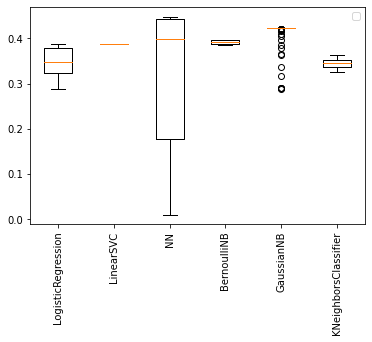

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

labels, data = acc_score_all.keys(), acc_score_all.values()
ax.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels, rotation=90)
plt.legend()
plt.show()